## 0208

In [ ]:
import pandas as pd
import re

data = "dbpedia_14"
text_len = 60
model = "transformeral"
layer = 5
epoch = 10
lr = 0.0001
fix_previous_layer = True
#for mask in range(1,1+layer):
mask = 5
save_path = f"ckpt/{data}_{model}_l{layer}_pad{text_len}_m{mask}/"  
#load_path = f"ckpt/{data}_{model}_l{layer}_pad{text_len}_m{mask-1}/" 
out_path = f"result/0117/fix train adapt/{data}_{model}_l{layer}ad_pad{text_len}_m{mask}/"
log = f"{out_path}/{data}_{model}_l{layer}.log"

with open(log,mode='r') as log:
    buffer = log.readlines()
    df = pd.DataFrame(buffer,columns=["log"])
    df

In [ ]:
class history(object):
    def __init__(self):
        self.auc = {}
        self.acc = {}
        self.entr = {}
        for threshold in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
            self.auc[threshold] = []
            self.acc[threshold] = []
            self.entr[threshold] = []
            
result = history()
for line in buffer:
    match = re.match('Test Epoch(.)*', line)
    if match!=None:
        print(match.group())
        match = re.findall("\d?\.\d+",match.group(0))
        print(match)
        threshold = float(match[0])
        result.acc[threshold].append(match[1])
        result.auc[threshold].append(match[2])
        result.entr[threshold].append(match[3])

In [ ]:
for threshold in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(len(result.acc[threshold]))
    print(len(result.auc[threshold]))
    print(len(result.entr[threshold]))

In [ ]:
### 2/06 - valid/test 80%:20%
###      - prefix
###      - plot result

import pandas as pd
import re

data = "ag_news"
text_len = 175


for model in ["linearal","lstmal","transformeral"]:
    result = [[] for _ in range(4)]
    for threshold in [.1,.2,.3,.4,.5,.6,.7,.8,.9]:

        layer = 5
        epoch = 10
        lr = 0.0001
        fix_previous_layer = False
        
        mask = 5
        out_path = f"result/0208/test/prefix/{data}_{model}_l{layer}adp_pad{text_len}_t{threshold}_m{mask}_test/"
        log = f"{out_path}/{data}_{model}_l{layer}.log"
            
        with open(log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                match = re.match('Test threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    #print(match[1])
                    result[0].append(float(match[1]))
                    result[1].append(float(match[2]))
                    result[2].append(float(match[3]))
            for line in buffer:
                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    #print(match[1])
                    result[3].append(float(match[1]))
    print("\n",model)
    for i in range(4):
        print(i)
        for v in result[i]:
            print(v)                    

                    

In [ ]:
### 2/06 - valid/test 80%:20%
###      - fix
###      - plot result

import pandas as pd
import re

data = "ag_news"
text_len = 175

for model in ["linearal","lstmal","transformeral"]:
    result = [[] for _ in range(4)]
    for threshold in [.1,.2,.3,.4,.5,.6,.7,.8,.9]:

        layer = 5
        epoch = 10
        lr = 0.0001
        fix_previous_layer = False
        
        mask = 5
        out_path = f"result/0208/test/fix/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask}_test/"
        log = f"{out_path}/{data}_{model}_l{layer}.log"
            
        with open(log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                match = re.match('Test threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    #print(match[1])
                    result[0].append(float(match[1]))
                    result[1].append(float(match[2]))
                    result[2].append(float(match[3]))
            for line in buffer:
                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    #print(match[1])
                    result[3].append(float(match[1]))
    print("\n",model)
    for i in range(4):
        print(i)
        for v in result[i]:
            print(v)                    

                    

## 0214


### base adapt

In [ ]:
### 0214
### pad base adapt 
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt




#for model in ["lstmal"]:
for model in ["lstmal","linearal","transformeral"]:
    total_result = pd.DataFrame(columns=['padding_size', 'model', 'test_threshold', 'test_acc', 'test_auc',
                                        'test_avg_entr', 'test_time'])
    #data = "ag_news"
    #for text_len in [25,50,75,100,125,150,175]:
    data = "dbpedia_14"
    for text_len in [20,40,60]:
        layer = 5
        epoch = 50
        lr = 0.0001
        save_path = f"ckpt/{data}_{model}_l{layer}ad_pad{text_len}/"
        #out_path = f"result/0220/ag_news/base adapt/{data}_{model}_l{layer}ad_pad{text_len}/"
        out_path = f"result/0220/dbpedia_14/base adapt/{data}_{model}_l{layer}ad_pad{text_len}/"
        "result/0220/dbpedia/base adapt/dbpedia_14_linearal_l5ad_pad20/dbpedia_14_linearal_l5.log"
        log = f"{out_path}/{data}_{model}_l{layer}.log"
        
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(epoch)]
        list_acc = []
        list_auc = []
        list_entr = []
        list_test_time = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        with open(log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)
                match = re.match('Test threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[1]))
                    list_auc.append(float(match[2]))
                    list_entr.append(float(match[3]))
                    

                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[1]))

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[1]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    current_th = int(float(match[0])*10)
                    list_ep_valid_acc.append(float(match[1]))
                    list_ep_valid_auc.append(float(match[2]))
                    list_ep_valid_entr.append(float(match[3]))
        print(save_th)    
        ep_valid_time = np.array(list_ep_valid_time).reshape((epoch,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((epoch,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((epoch,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((epoch,-1))
        
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        result_ep[[f"ep_valid.{(i+1)}_time" for i in range(9)]] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        para_size = 9
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        result["test_threshold"] = [(1+i)*0.1 for i in range(para_size)]
        result["best_ep"] = [best_ep[2:]]*para_size
        result["best_th"] = [save_th]*para_size
        result["best_acc_setting"] = [list_acc[save_th[-1]-1]]*para_size
        result["best_auc_setting"] = [list_auc[save_th[-1]-1]]*para_size
        result["test_acc"] = list_acc
        result["test_auc"] = list_auc
        result["test_avg_entr"] = list_entr
        result["test_time"] = list_test_time
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        #print(result)
        #print(result_ep)

        path = f"result/_csv/{data}/base_ad/"
        title = f"{data}_{model}_l{layer}ad_pad{text_len}({best_ep})"
        os.makedirs(path,exist_ok=True)
        """
        t = [0.1*(i+1) for i in range(9)]
        plt.title(title)
        plt.plot(t,result["test_time"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test time")
        plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_acc"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test acc")
        for i in range(9):
            if (i+1) in save_th:
                plt.plot((i+1)/10,result["test_acc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()

        plt.title(title)
        plt.plot(t,result["test_auc"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test auc")
        for i in range(9):
            if (i+1) in save_th:
                plt.plot((i+1)/10,result["test_auc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_avg_entr"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test avg entr")
        plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        """
        #result.to_csv(f"{path}/{title}.csv", index=False)
        #result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result

    title = f"{data}_{model}_l{layer}ad"
    total_result.to_csv(f"{path}/{title}.csv", index=False)
    

In [ ]:
total_result

### base shortcut

In [ ]:
### 0214
### pad base sc
### 0220 - ag_news/dbpedia_14 
###      - testing log有誤 "Test Epoch49 layer(.)*"
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

for model in ["lstmal","linearal","transformeral"]:
    total_result = pd.DataFrame(columns=['padding_size', 'model', 'test_acc', 'test_auc',
                                        'test_time'])
    #data = "ag_news"
    #for text_len in [25,50,75,100,125,150,175]:
    #data = "dbpedia_14"
    #for text_len in [20,40,60]:
    data = "imdb"
    for text_len in [100,200,300,400,500]:    
        layer = 5
        epoch = 50
        lr = 0.0001
        save_path = f"ckpt/{data}_{model}_l{layer}_pad{text_len}/"
        #out_path = f"result/0220/ag_news/base sc/{data}_{model}_l{layer}_pad{text_len}/"
        #out_path = f"result/0220/dbpedia/base sc/{data}_{model}_l{layer}_pad{text_len}/"
        out_path = f"result/0220/imdb/base sc/{data}_{model}_l{layer}_pad{text_len}/"
        log = f"{out_path}/{data}_{model}_l{layer}.log"
        
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(epoch)]
        list_acc = []
        list_auc = []
        list_entr = []
        list_test_time = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        test_part = False
        
        para_size = 5
        with open(log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match("Start Testing", line)
                if match!=None:
                    test_part = True
                    
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)
                
                if data == "imdb":
                    match = re.match('Test layer\d+(.)*', line)    
                else:    
                    match = re.match('Test Epoch49 layer(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[0]))
                    list_auc.append(float(match[1]))
                    list_entr.append(float(match[2]))
                    
                if data == "imdb":
                    match = re.match('l\d+_test_time(.)*', line)
                else:    
                    match = re.match('ep49_l\d_test_time(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[0]))

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                    
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_l\d+_test_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[0]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ layer(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    
                    list_ep_valid_acc.append(float(match[0]))
                    list_ep_valid_auc.append(float(match[1]))
                    list_ep_valid_entr.append(float(match[2]))
                    
                    match = re.findall('\d+', line)
                    current_th = int(match[1])
        print(save_th)    
        ep_valid_time = np.array(list_ep_valid_time).reshape((epoch,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((epoch,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((epoch,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((epoch,-1))
        
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        result_ep[[f"ep_valid_l{i}_time" for i in range(para_size)]] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        result["test_layer"] = [(i) for i in range(para_size)]
        result["best_ep"] = [best_ep[2:]]*para_size
        result["best_th"] = [save_th]*para_size
        result["best_acc_setting"] = [list_acc[save_th[-1]-1]]*para_size
        result["best_auc_setting"] = [list_auc[save_th[-1]-1]]*para_size
        result["test_acc"] = list_acc
        result["test_auc"] = list_auc
        result["test_avg_entr"] = list_entr
        result["test_time"] = list_test_time
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        #print(result)
        #print(result_ep)

        path = f"result/_csv/{data}/base_sc/"
        title = f"{data}_{model}_l{layer}_pad{text_len}({best_ep})"
        t = [(i) for i in range(para_size)]
        
        os.makedirs(path,exist_ok=True)

        """
        plt.title(title)
        plt.plot(t,result["test_time"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test time")
        plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_acc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test acc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_acc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()

        plt.title(title)
        plt.plot(t,result["test_auc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test auc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_auc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_avg_entr"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test avg entr")
        plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        """
        #result.to_csv(f"{path}/{title}.csv", index=False)
        #result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result
    
    title = f"{data}_{model}_l{layer}"
    total_result.to_csv(f"{path}/{title}.csv", index=False)
        

### fix/prefix adapt

In [ ]:
data = "ag_news"
for model in ["lstmal","linearal","transformeral"]:
    total_result = pd.DataFrame(columns=[])
    for threshold in [.1,.2,.3,.4,.5,.6,.7,.8,.9]:
        for text_len in [175]:
            layer = 5
            epoch = 10
            lr = 0.0001
            
            result = pd.DataFrame(columns=["padding_size"])
            result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
            result_ep["epoch"] = [*range(epoch)]
            list_acc = []
            list_auc = []
            list_entr = []
            list_test_time = []
            list_init_time = []
            list_train_time = []
            
            for mask in range(1,1+layer):
                save_path = f"ckpt/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask}/"  
                load_path = f"ckpt/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask-1}/" 
                #out_path = f"result/0220/ag_news/fix adapt/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask}/"
                out_path = f"result/0214/prefix adapt/{data}_{model}_l{layer}adf_pad{text_len}_t{threshold}_m{mask}/"
                log = f"{out_path}/{data}_{model}_l{layer}.log"
                
                with open(log,mode='r') as log:
                    buffer = log.readlines()
                    df = pd.DataFrame(buffer,columns=["log"])
                    df
                    
                    
                    for line in buffer:
                        match = re.match('Test threshold(.)*', line)
                        if match!=None:
                            match = re.findall("\d?\.\d+",match.group(0))
                            list_acc.append(float(match[1]))
                            list_auc.append(float(match[2]))
                            list_entr.append(float(match[3]))

                        match = re.match('t(.)*_test_time(.)*', line)
                        if match!=None:
                            match = re.findall("\d+\.\d+",match.group(0))
                            list_test_time.append(float(match[1]))
                        match = re.match('init_time(.)*', line)
                        if match!=None:
                            match = re.findall("\d+\.\d+",match.group(0))
                            list_init_time.append(float(match[0]))
                        match = re.match('(.)*valid_time(.)*', line)
                        if match!=None:
                            match = re.findall("\d+\.\d+",match.group(0))
                            list_train_time.append(float(match[0]))
                                
            result['threshold'] = [threshold]*5
            result['model'] = [model]*5
            result['padding_size'] = [text_len]*5
            result["train_mask"] = [(1+i) for i in range(5)]
            
            result["test_acc"] = list_acc
            result["test_auc"] = list_auc
            result["test_avg_entr"] = list_entr
            
            result["init_time"] = list_init_time
            result["test_time"] = list_test_time
            result["train+valid_time"] = list_train_time
        
            #print(result)
            total_result = pd.concat([total_result,result],axis=0,ignore_index=True)
    
    table = total_result[total_result["train_mask"]==5]
    #title = f"{data}_{model}_l{layer}f_pad{text_len}"
    title = f"{data}_{model}_l{layer}p_pad{text_len}"
    path = f"result/_csv/{data}"
                   
    print(total_result)
    total_result.to_csv(f"{path}/{title}.csv", index=False)
    
    plt.title(title)
    plt.plot(t,table["test_acc"],"o-") 
    plt.xlabel("threshold")
    plt.ylabel("test acc")
    plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
    plt.show()
    
    plt.title(title)
    plt.plot(t,table["test_auc"],"o-") 
    plt.xlabel("threshold")
    plt.ylabel("test auc")
    plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
    plt.show()
    
    plt.title(title)
    plt.plot(t,table["test_time"],"o-") 
    plt.xlabel("threshold")
    plt.ylabel("test time")
    plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
    plt.show()
    
    plt.title(title)
    plt.plot(t,table["test_avg_entr"],"o-") 
    plt.xlabel("threshold")
    plt.ylabel("test avg entr")
    plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
    plt.show()
    #break
            

### base fullpath

In [ ]:
### fullpath baseline
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
### 2/22 - baseline: valid/test with fullpath
data = "ag_news"
total_result = pd.DataFrame(columns=[])
for model in ["linearal","lstmal","transformeral"]:
    for text_len in [25,50,75,100,125,150,175]:
### 2/26 - dbpedia
#data = "dbpedia_14"
#for text_len in [20,40,60]:
### 2/28 - imdb 8:1:1
#data = "imdb"
#for text_len in [100,200,300,400,500]:
    
        
        layer = 5
        epoch = 50
        lr = 0.0001
        save_path = f"ckpt/{data}_{model}_l{layer}base_pad{text_len}/"
        out_path = f"result/0227/{data}_{model}_l{layer}base_pad{text_len}/"
        log = f"{out_path}/{data}_{model}_l{layer}base.log"
        
        
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(epoch)]
        list_acc = []
        list_auc = []
        list_entr = []
        list_test_time = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        test_part = False
        
        para_size = 1
        with open(log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match("Start Testing", line)
                if match!=None:
                    test_part = True
                    
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)
                    
                match = re.match('Test layer\d Acc(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[0]))
                    list_auc.append(float(match[1]))
                    list_entr.append(float(match[2]))
                    

                match = re.match('Test layer\d Acc(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[0]))

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                    
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_l\d+_test_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[0]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ layer(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    
                    list_ep_valid_acc.append(float(match[0]))
                    list_ep_valid_auc.append(float(match[1]))
                    list_ep_valid_entr.append(float(match[2]))
                    
                    match = re.findall('\d+', line)
                    current_th = int(match[1])
        print(save_th)    
        ep_valid_time = np.array(list_ep_valid_time).reshape((epoch,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((epoch,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((epoch,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((epoch,-1))
        
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        result_ep[[f"ep_valid_l{i}_time" for i in range(para_size)]] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        result["test_layer"] = [(i) for i in range(para_size)]
        result["test_acc"] = list_acc
        result["test_auc"] = list_auc
        result["test_avg_entr"] = list_entr
        result["test_time"] = list_test_time
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        result['best_ep'] = best_ep
        #print(result)
        #print(result_ep)
        """
        path = f"result/_csv/{data}"
        title = f"{data}_{model}_l{layer}_pad{text_len}({best_ep})"
        t = [(i) for i in range(para_size)]
        try:
            os.mkdir(path)
        except:
            pass 
        
        plt.title(title)
        plt.plot(t,result["test_time"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test time")
        plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_acc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test acc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_acc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()

        plt.title(title)
        plt.plot(t,result["test_auc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test auc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_auc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_avg_entr"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test avg entr")
        plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        """
        #result.to_csv(f"{path}/{title}.csv", index=False)
        #result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result
    path = f"result/_csv/{data}"
    title = f"{data}_{model}_l{layer}base"
    total_result.to_csv(f"{path}/{title}_ep.csv", index=False)
    

## 0308


### fullpath baseline 多次

In [ ]:
### fullpath baseline
### 2/22 - baseline: valid/test with fullpath
### 2/26 - dbpedia
### 2/28 - imdb 8:1:1
### 3/08 - read more files
### 3/20 - fullpath training now do shortcut/adaptive inference

In [10]:
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

total_result = pd.DataFrame(columns=[])

#data = "ag_news"
#for text_len in [25,50,75,100,125,150,175]:

#data = "dbpedia_14"
#for text_len in [20,40,60]:

data = "imdb"
#for text_len in [100,200,300,400,500]:
#for test_count in range(5):
text_len = 500
#text_len = 80
#text_len = 177
for model in ["linearal","lstmal","transformeral"]:
    layer = 5
    epoch = 20
    lr = 0.0001
    out_path = f"result/0318/fullpath+sc_ad/{data}_{model}_l{layer}base512_pad{text_len}/"

    log_list = os.listdir(out_path)
    print(log_list)
    for log in log_list:
        
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(epoch)]
        list_acc = []
        list_auc = []
        list_f1 = []
        list_entr = []
        list_acc_th = []
        list_auc_th = []
        list_f1_th = []
        list_entr_th = []
        list_test_time = []
        list_test_time_th = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        list_ep_valid_f1 = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        test_part = False
        
        #para_size = 1
        para_size = 5+9
        with open(out_path+log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match("Start Testing", line)
                if match!=None:
                    test_part = True
                    
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                    
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_l\d+_test_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[0]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ layer(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    
                    list_ep_valid_acc.append(float(match[0]))
                    list_ep_valid_auc.append(float(match[1]))
                    list_ep_valid_entr.append(float(match[2]))
                    list_ep_valid_f1.append(float(match[3]))
                    
                    match = re.findall('\d+', line)
                    current_th = int(match[1])
                
                ### testing part
                match = re.match('Test layer\d Acc(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[0]))
                    list_auc.append(float(match[1]))
                    list_entr.append(float(match[2]))
                    list_f1.append(float(match[3]))
                    
                match = re.match('l\d+_test_time(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[0]))
                
                match = re.match('Test threshold(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc_th.append(float(match[1]))
                    list_auc_th.append(float(match[2]))
                    list_entr_th.append(float(match[3]))
                    list_f1_th.append(float(match[4]))
                    
                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time_th.append(float(match[1]))
        print(save_th)    
        ep_valid_time = np.array(list_ep_valid_time).reshape((epoch,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((epoch,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((epoch,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((epoch,-1))
        ep_valid_f1 = np.array(list_ep_valid_entr).reshape((epoch,-1))
        
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        result_ep["ep_valid_l4_time"] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        #result["test_layer"] = [(i) for i in range(para_size)]
        result["test_setting"] = [i for i in range(5)]+[0.1*(i+1) for i in range(9)]
        result["test_acc"] = list_acc + list_acc_th
        result["test_auc"] = list_auc + list_auc_th
        result["test_f1"] = list_f1 + list_f1_th
        result["test_avg_entr"] = list_entr + list_entr_th
        result["test_time"] = list_test_time + list_test_time_th
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        result['best_ep'] = best_ep[3:]
        #print(result)
        #print(result_ep)
        """
        path = f"result/_csv/{data}"
        title = f"{data}_{model}_l{layer}_pad{text_len}({best_ep})"
        t = [(i) for i in range(para_size)]
        try:
            os.mkdir(path)
        except:
            pass 
        
        plt.title(title)
        plt.plot(t,result["test_time"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test time")
        plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_acc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test acc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_acc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()

        plt.title(title)
        plt.plot(t,result["test_auc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test auc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_auc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_avg_entr"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test avg entr")
        plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        """
        #result.to_csv(f"{path}/{title}.csv", index=False)
        #result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result
path = f"result/_csv/{data}"
os.makedirs(path, exist_ok=True)
title = f"{data}_l{layer}base_512"
total_result.to_csv(f"{path}/{title}.csv", index=False)
    


['imdb_linearal_l5base512_5.log', 'imdb_linearal_l5base512_1.log', 'imdb_linearal_l5base512_3.log', 'imdb_linearal_l5base512_2.log', 'imdb_linearal_l5base512_0.log', 'imdb_linearal_l5base512_4.log']
[4]
[4]


ValueError: cannot reshape array of size 20 into shape (30,newaxis)

### adapt 多次

In [ ]:
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
total_result = pd.DataFrame(columns=[])

### 2/04 - valid/test 80%:20%
###      - save_path unique for test load
###      - "lstmal","linearal","transformeral" adapt valid pad save best auc
### 2/08 - valid/test 50%:50%
#data = "ag_news"
#for text_len in [25,50,75,100,125,150,175]:
#for text_len in [50,75,100,125,150,175]:
### 2/18 - dbpedia
#data = "dbpedia_14"
#for text_len in [20,40,60]:
data = "imdb"

text_len = 500
#text_len = 177
for model in ["lstmal","linearal","transformeral"]:
    layer = 5
    epoch = 30
    lr = 0.0001
    save_path = f"ckpt/{data}_{model}_l{layer}ad_pad{text_len}/"
    out_path = f"result/0315/timer fixed/imdb/{data}_{model}_l{layer}ad_pad{text_len}/"
    log_list = os.listdir(out_path)
    print(log_list)
    for log in log_list:
        
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(epoch)]
        list_acc = []
        list_auc = []
        list_entr = []
        list_f1 = []
        list_test_time = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        with open(out_path+log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)
                match = re.match('Test threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[1]))
                    list_auc.append(float(match[2]))
                    list_entr.append(float(match[3]))
                    list_f1.append(float(match[4]))
                    

                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[1]))

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_t(.)*_test_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[1]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ threshold(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    current_th = int(float(match[0])*10)
                    list_ep_valid_acc.append(float(match[1]))
                    list_ep_valid_auc.append(float(match[2]))
                    list_ep_valid_entr.append(float(match[3]))
        print(save_th)    
        ep_valid_time = np.array(list_ep_valid_time).reshape((epoch,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((epoch,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((epoch,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((epoch,-1))
        
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        result_ep[[f"ep_valid.{(i+1)}_time" for i in range(9)]] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        para_size = 9
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        result["test_threshold"] = [(1+i)*0.1 for i in range(para_size)]
        result["best_ep"] = [best_ep[2:]]*para_size
        result["best_th"] = [save_th]*para_size
        result["best_acc_setting"] = [list_acc[save_th[-1]-1]]*para_size
        result["best_auc_setting"] = [list_auc[save_th[-1]-1]]*para_size
        result["best_f1_setting"] = [list_f1[save_th[-1]-1]]*para_size
        result["best_entr_setting"] = [list_entr[save_th[-1]-1]]*para_size
        result["test_time_setting"] = [list_test_time[save_th[-1]-1]]*para_size
        result["test_acc"] = list_acc
        result["test_auc"] = list_auc
        result["test_f1"] = list_f1
        result["test_avg_entr"] = list_entr
        result["test_time"] = list_test_time
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        #print(result)
        #print(result_ep)

        path = f"result/_csv/{data}/base_ad/"
        title = f"{data}_{model}_l{layer}ad_pad{text_len}({best_ep})"
        os.makedirs(path,exist_ok=True)
        """
        t = [0.1*(i+1) for i in range(9)]
        plt.title(title)
        plt.plot(t,result["test_time"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test time")
        plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_acc"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test acc")
        for i in range(9):
            if (i+1) in save_th:
                plt.plot((i+1)/10,result["test_acc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()

        plt.title(title)
        plt.plot(t,result["test_auc"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test auc")
        for i in range(9):
            if (i+1) in save_th:
                plt.plot((i+1)/10,result["test_auc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_avg_entr"],"o-") 
        plt.xlabel("threshold")
        plt.ylabel("test avg entr")
        plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        """
        #result.to_csv(f"{path}/{title}.csv", index=False)
        #result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result

title = f"{data}_l{layer}ad"
total_result.to_csv(f"{path}/{title}.csv", index=False)
    

### shortcut 多次

In [ ]:
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
total_result = pd.DataFrame(columns=[])

### baseline shortcut

### 2/04 - valid/test 80%:20%
###      - baseline
### 2/14 - valid/test 50%:50%
#data = "ag_news"
#for text_len in [25,50,75,100,125,150,175]:
### 2/18 - dbpedia
#data = "dbpedia_14"
#for text_len in [20,40,60]:
### 2/28 - imdb 8:1:1
data = "imdb"
#for text_len in [100,200,300,400,500]:

text_len = 500
#text_len = 177
for model in ["linearal","lstmal","transformeral",]:
    layer = 5
    epoch = 30
    lr = 0.0001
    save_path = f"ckpt/{data}_{model}_l{layer}_pad{text_len}/"
    out_path = f"result/0315/timer fixed/imdb/{data}_{model}_l{layer}_pad{text_len}/"
    log_list = os.listdir(out_path)
    print(log_list)
    for log in log_list:
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(epoch)]
        list_acc = []
        list_auc = []
        list_f1 = []
        list_entr = []
        list_test_time = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        test_part = False
        
        para_size = 5
        with open(out_path + log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match("Start Testing", line)
                if match!=None:
                    test_part = True
                    
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)
                
                match = re.match('Test layer\d+(.)*', line)    
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[0]))
                    list_auc.append(float(match[1]))
                    list_entr.append(float(match[2]))
                    list_f1.append(float(match[3]))
                    

                match = re.match('l\d+_test_time(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[0]))

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                    
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_l\d+_test_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[0]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ layer(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    
                    list_ep_valid_acc.append(float(match[0]))
                    list_ep_valid_auc.append(float(match[1]))
                    list_ep_valid_entr.append(float(match[2]))
                    
                    match = re.findall('\d+', line)
                    current_th = int(match[1])
        print(save_th)    
        ep_valid_time = np.array(list_ep_valid_time).reshape((epoch,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((epoch,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((epoch,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((epoch,-1))
        
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        result_ep[[f"ep_valid_l{i}_time" for i in range(para_size)]] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        result["test_layer"] = [(i) for i in range(para_size)]
        result["best_ep"] = [best_ep[2:]]*para_size
        result["best_th"] = [save_th]*para_size
        result["best_acc_setting"] = [list_acc[save_th[-1]]]*para_size
        result["best_auc_setting"] = [list_auc[save_th[-1]]]*para_size
        result["best_f1_setting"] = [list_f1[save_th[-1]]]*para_size
        result["best_entr_setting"] = [list_entr[save_th[-1]]]*para_size
        result["test_time_setting"] = [list_test_time[save_th[-1]]]*para_size
        result["test_acc"] = list_acc
        result["test_auc"] = list_auc
        result["test_f1"] = list_f1
        result["test_avg_entr"] = list_entr
        result["test_time"] = list_test_time
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        #print(result)
        #print(result_ep)

        path = f"result/_csv/{data}/base_sc/"
        title = f"{data}_{model}_l{layer}_pad{text_len}({best_ep})"
        t = [(i) for i in range(para_size)]
        
        os.makedirs(path,exist_ok=True)

        """
        plt.title(title)
        plt.plot(t,result["test_time"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test time")
        plt.savefig(f"{path}/{title}_plt_test_time.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_acc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test acc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_acc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_acc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()

        plt.title(title)
        plt.plot(t,result["test_auc"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test auc")
        for i in range(para_size):
            if (i) == save_th[-1]:
                plt.plot((i),result["test_auc"][i],"ro") 
        plt.savefig(f"{path}/{title}_plt_auc.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        
        plt.title(title)
        plt.plot(t,result["test_avg_entr"],"o-") 
        plt.xlabel("shortcut")
        plt.ylabel("test avg entr")
        plt.savefig(f"{path}/{title}_plt_entr.png", bbox_inches = "tight",facecolor='white', transparent=False)
        plt.show()
        """
        #result.to_csv(f"{path}/{title}.csv", index=False)
        #result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result
    
title = f"{data}_l{layer}"
total_result.to_csv(f"{path}/{title}.csv", index=False)
        

### side adapt 

In [6]:
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

total_result = pd.DataFrame(columns=[])

#data = "ag_news"
#for text_len in [25,50,75,100,125,150,175]:

#data = "dbpedia_14"
#for text_len in [20,40,60]:

data = "imdb"
#for text_len in [100,200,300,400,500]:
#for test_count in range(5):
text_len = 200
#text_len = 80
#text_len = 175
for model in ["transformeralside","linearalside","lstmalside"]:
    layer = 5
    epoch = 50
    lr = 0.0005
    out_path = f"result/0328/256 200 0.0005/{data}_{model}_l{layer}_256_sidead/"
    log_list = os.listdir(out_path)
    print(log_list)
    for log in log_list:
        
        result = pd.DataFrame(columns=["padding_size"])
        result_ep = pd.DataFrame(columns=["epoch","ep_train_time"])
        result_ep["epoch"] = [*range(epoch)]
        list_acc = []
        list_auc = []
        list_f1 = []
        list_entr = []
        list_acc_th = []
        list_auc_th = []
        list_f1_th = []
        list_entr_th = []
        list_test_time = []
        list_test_time_th = []
        list_ep_train_time = []
        list_ep_train_acc = []
        list_ep_train_auc = []
        list_ep_train_entr = []
        list_ep_valid_time = []
        list_ep_valid_acc = []
        list_ep_valid_auc = []
        list_ep_valid_entr = []
        list_ep_valid_f1 = []
        train_time = 0
        init_time = 0
        best_ep = -1
        best_th = []
        save_th = []
        test_part = False
        
        #para_size = 1
        para_size = 5+9
        with open(out_path+log,mode='r') as log:
            buffer = log.readlines()
            df = pd.DataFrame(buffer,columns=["log"])
            df
            
            for line in buffer:
                
                
                match = re.match("Start Testing", line)
                if match!=None:
                    test_part = True
                    
                match = re.match('Save ckpt to (.)*', line)
                if match!=None:
                    match = re.findall("ep \d+",match.group(0))
                    best_ep = match[0]
                    best_th.append(current_th)

                match = re.match('init_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    init_time = float(match[0])
                    
                match = re.match('(.)*valid_time(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    train_time = float(match[0])
                    
                match = re.match('ep(\d)+_train_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_time.append(float(match[0]))
                    
                match = re.match('ep(\d)+_l\d+_test_time(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_valid_time.append(float(match[0]))
                    
                match = re.match('Train Epoch\d+ Acc(.)*', line)
                if match!=None:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_ep_train_acc.append(float(match[0]))
                    list_ep_train_auc.append(float(match[1]))
                    #print(best_th)
                    if len(best_th)>0:
                        save_th = best_th
                    best_th = []
                    
                match = re.match('Test Epoch\d+ layer(.)*', line)
                if match!=None and test_part==False:
                    match = re.findall("\d+\.\d+",match.group(0))
                    #print(line)
                    #print(match)
                    
                    list_ep_valid_acc.append(float(match[0]))
                    list_ep_valid_auc.append(float(match[1]))
                    list_ep_valid_entr.append(float(match[2]))
                    list_ep_valid_f1.append(float(match[3]))
                    
                    match = re.findall('\d+', line)
                    current_th = int(match[1])
                
                ### testing part
                match = re.match('Test layer\d Acc(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc.append(float(match[0]))
                    list_auc.append(float(match[1]))
                    list_entr.append(float(match[2]))
                    list_f1.append(float(match[3]))
                    
                match = re.match('l\d+_test_time(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time.append(float(match[0]))
                
                match = re.match('Test threshold(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d?\.\d+",match.group(0))
                    list_acc_th.append(float(match[1]))
                    list_auc_th.append(float(match[2]))
                    list_entr_th.append(float(match[3]))
                    list_f1_th.append(float(match[4]))
                    
                match = re.match('t(.)*_test_time(.)*', line)
                if match!=None and test_part==True:
                    match = re.findall("\d+\.\d+",match.group(0))
                    list_test_time_th.append(float(match[1]))
        print(save_th)    
        
        ep_valid_time = np.array(list_ep_valid_time).reshape((epoch,-1))
        ep_valid_acc = np.array(list_ep_valid_acc).reshape((epoch,-1))
        ep_valid_auc = np.array(list_ep_valid_auc).reshape((epoch,-1))
        ep_valid_entr = np.array(list_ep_valid_entr).reshape((epoch,-1))
        ep_valid_f1 = np.array(list_ep_valid_entr).reshape((epoch,-1))
        print()    
        result_ep["ep_train_acc"] = list_ep_train_acc 
        result_ep["ep_train_auc"] = list_ep_train_auc          
        result_ep["ep_valid_time"] = np.sum(ep_valid_time,-1) 
        #result_ep["ep_valid_l4_time"] = ep_valid_time
        result_ep["ep_train_time"] = list_ep_train_time 
        
        
        result['model'] = [model]*para_size
        result['padding_size'] = [text_len]*para_size
        #result["test_layer"] = [(i) for i in range(para_size)]
        result["test_setting"] = [i for i in range(5)]+[0.1*(i+1) for i in range(9)]
        result["test_acc"] = list_acc + list_acc_th
        result["test_auc"] = list_auc + list_auc_th
        result["test_f1"] = list_f1 + list_f1_th
        result["test_avg_entr"] = list_entr + list_entr_th
        result["test_time"] = list_test_time + list_test_time_th
        result["init_time"] = [init_time]*para_size
        result["train+valid_time"] = [train_time]*para_size
        result["train_time"] = [result_ep["ep_train_time"].sum()]*para_size
        result["valid_time"] = [result_ep["ep_valid_time"].sum()]*para_size
        result['best_ep'] = best_ep[3:]
        #print(result)
        #print(result_ep)
        #result.to_csv(f"{path}/{title}.csv", index=False)
        #result_ep.to_csv(f"{path}/{title}_ep.csv", index=False)
        total_result = pd.concat([total_result,result],axis=0,ignore_index=True)            
        del result
path = f"result/_csv/{data}"
os.makedirs(path, exist_ok=True)
title = f"{data}_l{layer}side200"
total_result.to_csv(f"{path}/{title}.csv", index=False)
    


['imdb_transformeralside_l5_256_sidead_2.log', 'imdb_transformeralside_l5_256_sidead_8.log', 'imdb_transformeralside_l5_256_sidead_0.log', 'imdb_transformeralside_l5_256_sidead_4.log', 'imdb_transformeralside_l5_256_sidead_6.log', 'imdb_transformeralside_l5_256_sidead_5.log', 'imdb_transformeralside_l5_256_sidead_1.log', 'imdb_transformeralside_l5_256_sidead_3.log', 'imdb_transformeralside_l5_256_sidead_7.log']
[4]

[3, 4]

[1, 2, 3, 4]

[2, 3, 4]

[2, 3, 4]

[2, 3, 4]

[2, 3]

[4]

[2, 3]

['imdb_linearalside_l5_256_sidead_6.log', 'imdb_linearalside_l5_256_sidead_5.log', 'imdb_linearalside_l5_256_sidead_4.log', 'imdb_linearalside_l5_256_sidead_7.log', 'imdb_linearalside_l5_256_sidead_8.log', 'imdb_linearalside_l5_256_sidead_1.log', 'imdb_linearalside_l5_256_sidead_2.log', 'imdb_linearalside_l5_256_sidead_3.log', 'imdb_linearalside_l5_256_sidead_0.log']
[3]

[0]

[2]

[2]

[1]

[0]

[0]

[1]

[0]

['imdb_lstmalside_l5_256_sidead_3.log', 'imdb_lstmalside_l5_256_sidead_8.log', 'imdb_lstm

## 0426

files:  ['cifar10_CNN_AL_l4_3.log', 'cifar10_CNN_AL_l4_4.log', 'cifar10_CNN_AL_l4_1.log', 'cifar10_CNN_AL_l4_0.log', 'cifar10_CNN_AL_l4_2.log']
best_ep: 169
[0.8304  0.85106 0.86606 0.8591  0.83582 0.83178 0.83064 0.8304  0.8304
 0.8304  0.8304  0.8304  0.8304 ]
[0.71629219 0.68609045 0.73361978 0.75081428 0.7924447  0.75784016
 0.73030549 0.73748543 0.79271815 0.73361808 0.73820385 0.73271498
 0.75380132]
cifar10 CNN_AL
shortcut/adaptive inference
confidence type: Max yi


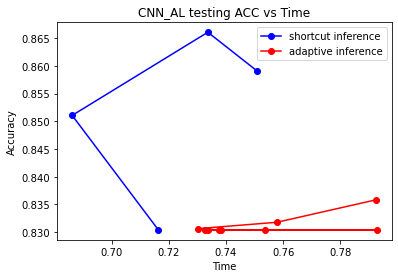

shortcut inference


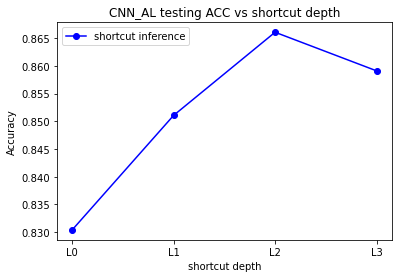

adaptive inference


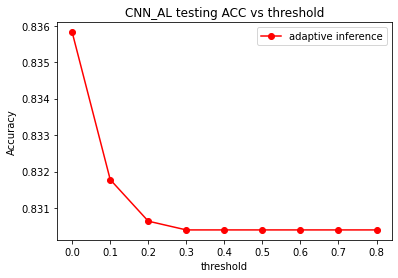

files:  ['cifar10_VGG_AL_l4_3.log', 'cifar10_VGG_AL_l4_0.log', 'cifar10_VGG_AL_l4_2.log', 'cifar10_VGG_AL_l4_4.log', 'cifar10_VGG_AL_l4_1.log', 'sig+sig ce 500.log']
best_ep: 183
[0.70491667 0.77781667 0.89503333 0.90193333 0.72096667 0.707
 0.7052     0.70491667 0.70491667 0.70491667 0.70491667 0.70491667
 0.70491667]
[1.16673396 1.30669108 1.28999569 1.34943991 1.23230743 1.20022069
 1.18225727 1.18075551 1.15006409 1.15734457 1.15929125 1.15265619
 1.13661973]
cifar10 VGG_AL
shortcut/adaptive inference
confidence type: Max yi


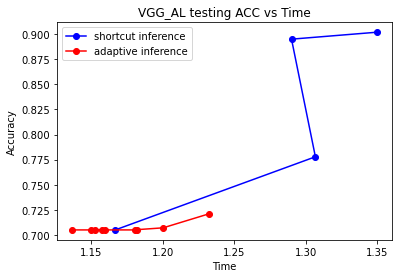

shortcut inference


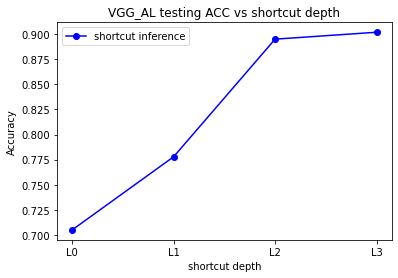

adaptive inference


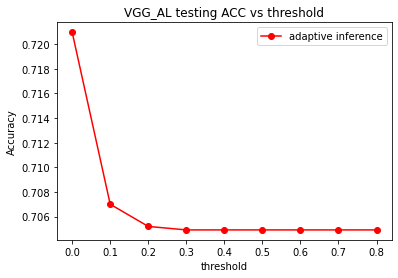

FileNotFoundError: [Errno 2] No such file or directory: 'result/0418/strong b128/cifar10_resnet_AL_l4_strong_b128/'

In [44]:
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

for data in ["cifar10", "cifar100", "tinyImageNet"]:
    for model in ["CNN_AL","VGG_AL","resnet_AL",]:
        layer = 4
        epoch = 200
        lr = 0.001
        aug_type = "strong"
        save_path = f"ckpt/{data}_{model}_l{layer}_{aug_type}/"
        
        #out_path = f"result/0501/adapt rewrite/conf max/{data}_{model}_l{layer}_{aug_type}_max/"
        out_path = f"result/0418/strong b128/{data}_{model}_l{layer}_{aug_type}/"

        
        log_list = os.listdir(out_path)
        print("files: ",log_list)
        avg_acc = []
        avg_time = []
        for log in log_list:
            para_size = 5+9
            with open(out_path+log,mode='r') as log:
                buffer = log.readlines()
                list_ep_train_acc=[]
                list_ep_valid_acc=[]
                list_ep_valid_time=[]
                for line in buffer:
                    match = re.match('Train Epoch\d+ Acc(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_train_acc.append(float(match[0]))

                        
                    match = re.match('Test Epoch\d+ layer(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_acc.append(float(match[0]))
                    
                    match = re.match("Test threshold \d+\.\d+ Acc(.)*", line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_acc.append(float(match[1]))
                    
                    match = re.match('ep\d+_l\d+_test_time(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_time.append(float(match[0]))
                        
                    match = re.match('t\d+\.\d+_test_time(.)*', line)
                    if match!=None:
                        match = re.findall("\d+\.\d+",match.group(0))
                        list_ep_valid_time.append(float(match[1]))    
                    match = re.match('Best AUC tensor(.)*', line)
                    if match!=None:
                        match = re.findall("[0-9]+\.?[0-9]+",match.group(0))
                        best_ep = int(match[1])
                #print(len(list_ep_train_acc))
                #print(len(list_ep_valid_acc))
                #print(len(list_ep_valid_time))
                list_ep_train_acc = np.array(list_ep_train_acc)
                list_ep_valid_acc = np.array(list_ep_valid_acc).reshape((-1, 13))
                list_ep_valid_time = np.array(list_ep_valid_time).reshape((-1, 13))
                
                #print(list_ep_valid_acc[best_ep,:])
                #print(list_ep_valid_time[best_ep,:])
                avg_acc.append(list_ep_valid_acc[best_ep,:])
                avg_time.append(list_ep_valid_time[best_ep,:]) 
        avg_acc = np.array(avg_acc)
        avg_time = np.array(avg_time)
        avg_acc = (np.mean(avg_acc, axis=0))
        avg_time = (np.mean(avg_time, axis=0))
        print(f"best_ep: {best_ep}")
        print(avg_acc)
        print(avg_time)
        
        print((f"{data} {model}"))
        print(("shortcut/adaptive inference"))
        print(("confidence type: Max yi"))
        plt.title(f"{model} testing ACC vs Time")
        plt.xlabel("Time")
        plt.ylabel("Accuracy")
        plt.plot(avg_time[:4],avg_acc[:4],"bo-", label='shortcut inference')
        plt.plot(avg_time[4:],avg_acc[4:],"ro-", label='adaptive inference')
        plt.legend()
        plt.show()

        print(("shortcut inference"))
        plt.title(f"{model} testing ACC vs shortcut depth")
        plt.xlabel("shortcut depth")
        plt.ylabel("Accuracy")
        x = [f"L{i}" for i in range(4)]
        plt.plot(x,avg_acc[:4],"bo-", label='shortcut inference')
        plt.legend()
        plt.show()

        print(("adaptive inference"))
        plt.title(f"{model} testing ACC vs threshold")
        plt.xlabel("threshold")
        plt.ylabel("Accuracy")
        x = [0.1*i for i in range(9)]
        plt.plot(x,avg_acc[4:],"ro-", label='adaptive inference')
        plt.legend()
        plt.show()      
